<a href="https://colab.research.google.com/github/kelvinnjunge/fina/blob/main/financial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FINANCIAL INCLUSION ANALYSIS



## 1. Defining the Question

### a) Specifying the Data Analytic Question
Financial Inclusion: Identify how we can predict which individuals are most likely to have or use a bank account across Kenya, Rwanda, Tanzania, and Uganda.


### b) Defining the Metric for Success
Identifying which individuals are more likely to have or use the bank



### c) Understanding the context 
to solve the challenge of financial inclusion, in several regions across east Africa, i have been assigned to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.


### d) Recording the Experimental Design
How does the age of a person relate to bank account access/use?



### e) Data Relevance


## 2. Reading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/Financial Dataset - 1 (3).csv")

## 3. Checking the Data

In [2]:
df.head(1)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed


## 4. External Data Source Validation


## 5. Tidying the Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


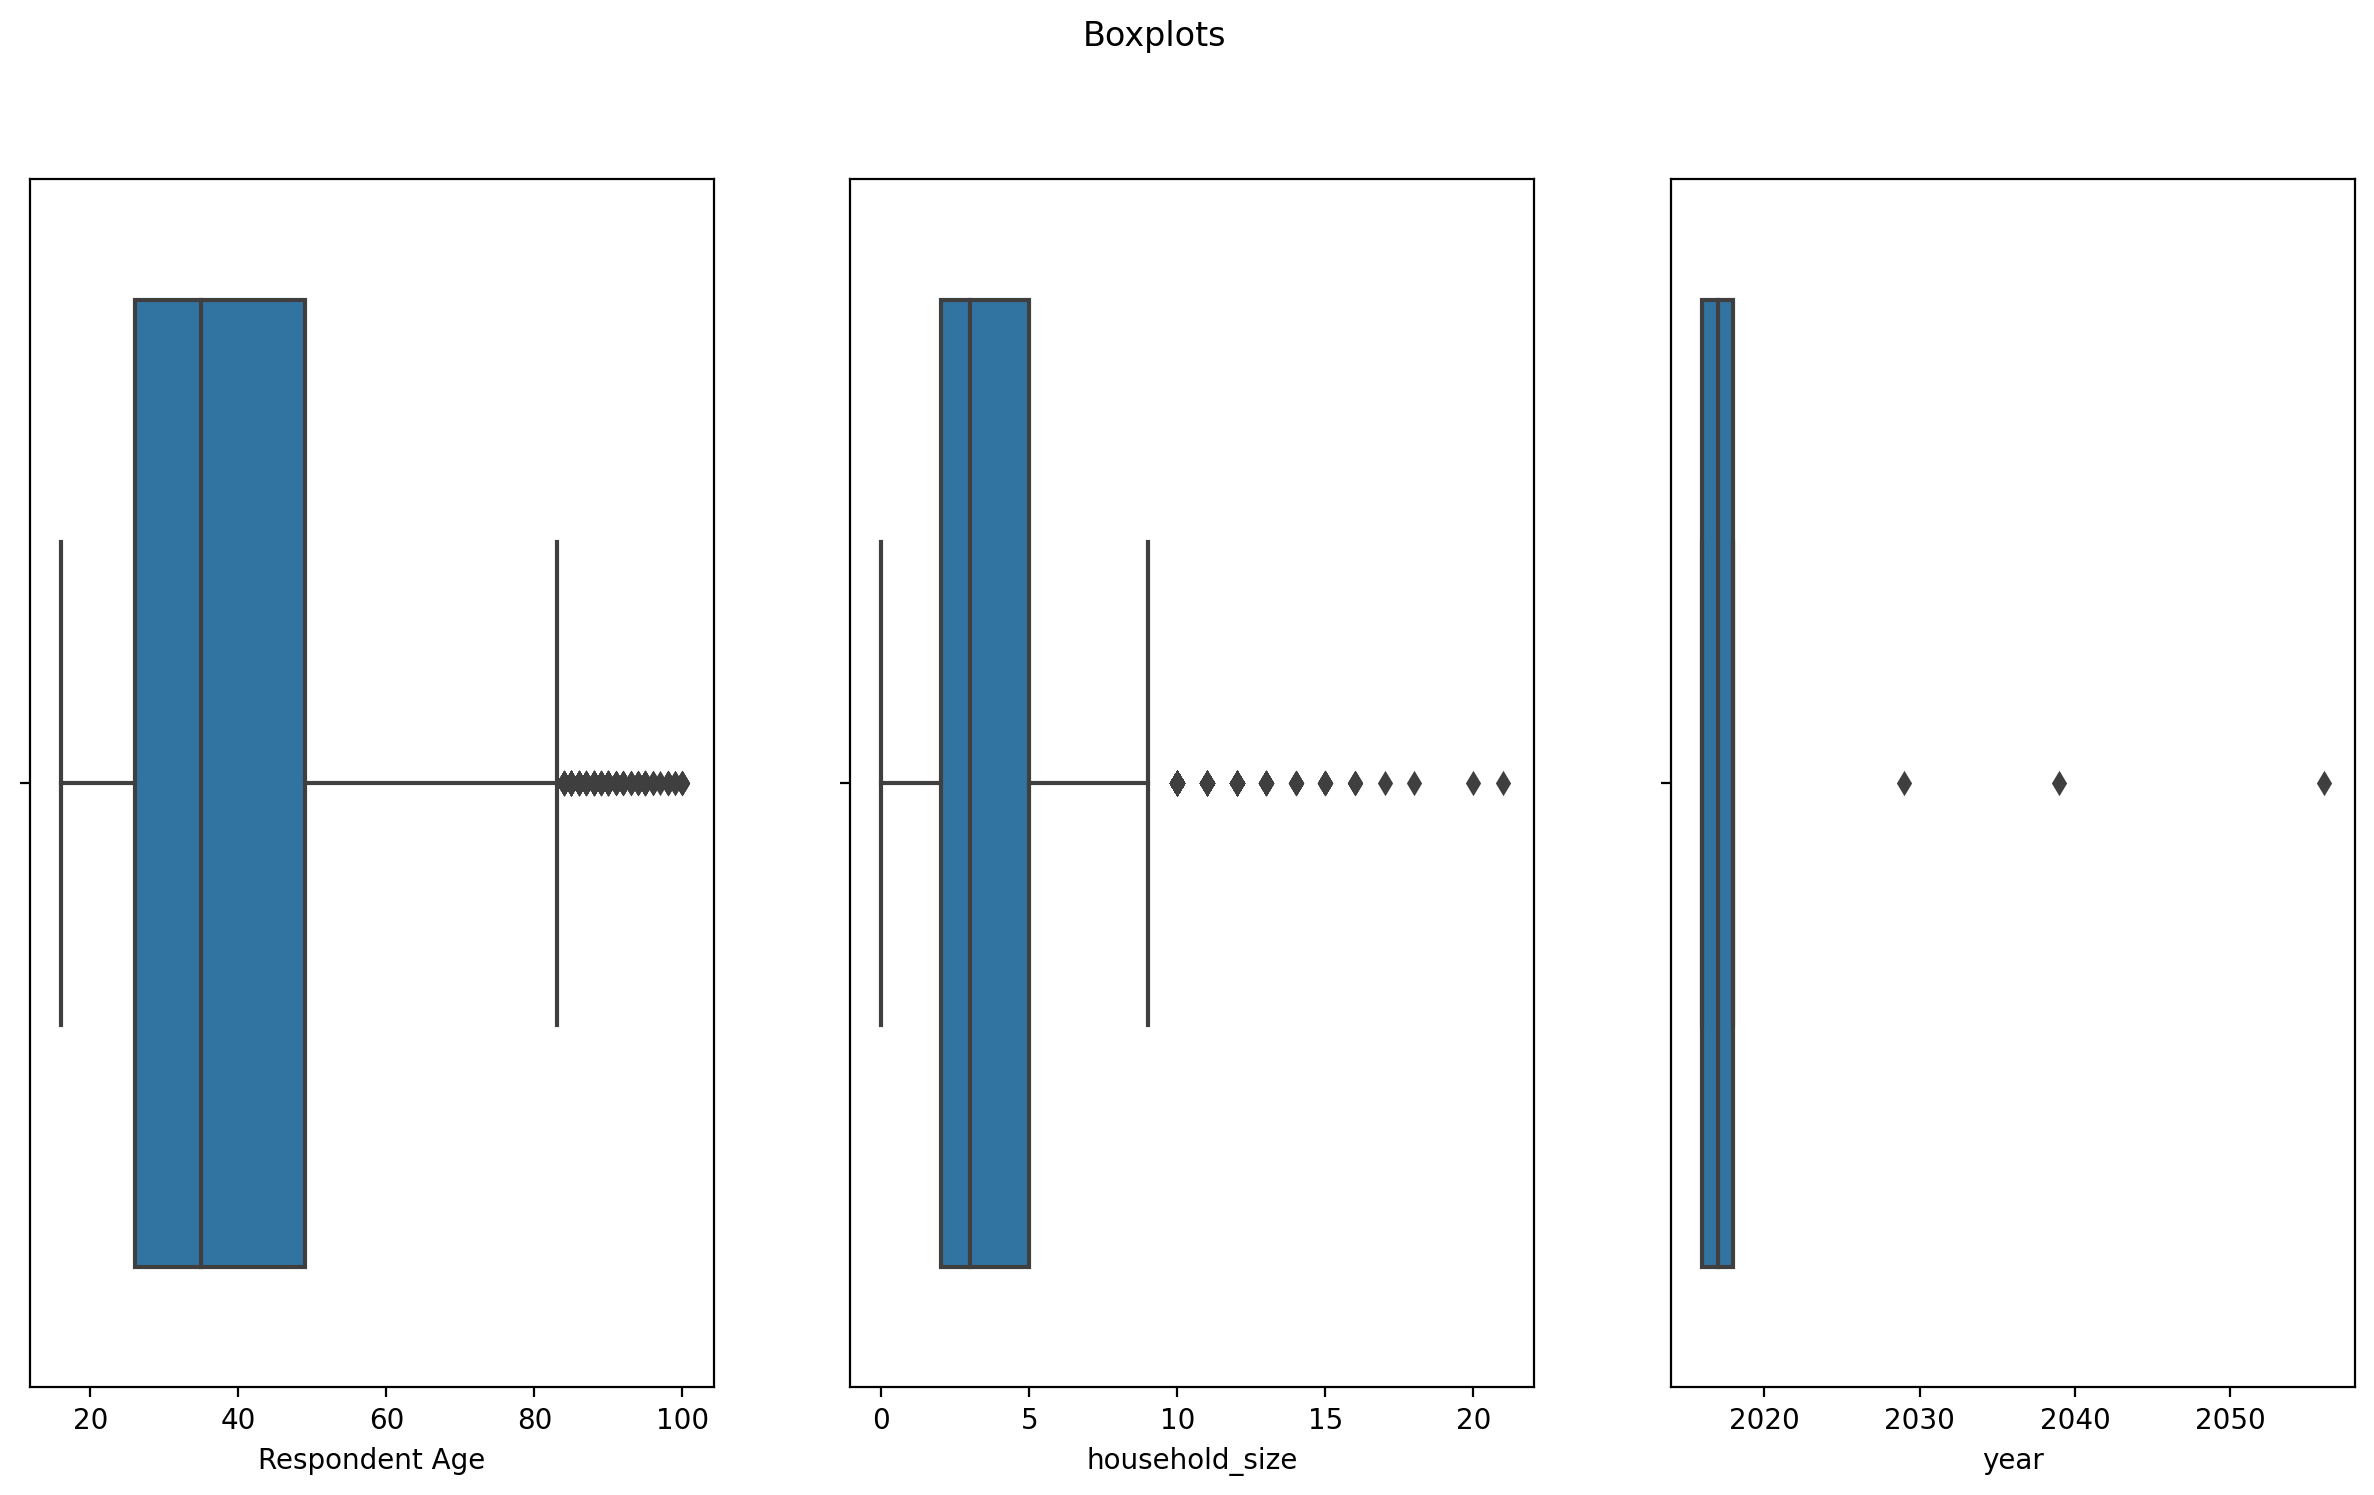

In [5]:
# Checking for Outliers
fig, ((ax1, ax2,ax3)) = plt.subplots(1,3, figsize=(15, 8),dpi=200)
fig.suptitle('Boxplots')
sns.boxplot(df['Respondent Age'], ax=ax1)
sns.boxplot(df['household_size'], ax=ax2)
sns.boxplot(df['year'], ax=ax3)
plt.show()

In [10]:
# Checking for Anomalies
q1,q3 = np.percentile(df['year'],(25,75))
iqr = q3 - q1

lower = q1-(1.5*iqr)
upper = q3 + (1.5*iqr)
df[(df['year']<lower)|(df['year']>upper)]
df.drop(df[(df['year']<lower)|(df['year']>upper)].index,inplace=True)
 

In [11]:
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [13]:
# Dropping the missing values
df.dropna(0,inplace=True)

In [15]:
# Checking for duplicates
df.duplicated().sum()

0

In [ ]:
# Dropping and renaming the columns name
df.drop(columns="uniqueid",inplace=True)
df.rename(columns={'Has a Bank account':'bank_account',
                    'Cell Phone Access':'cell_phone_access',
                     'Respondent Age':'age',
                     'The relathip with head':'the_relationship_with_head',
                     'Level of Educuation':'level_of_education',
                     'Type of Job':'job_type',
                     'Type of Location':'location'},inplace=True)

In [18]:
df.head(5)

,country,year,bank_account,location,cell_phone_access,household_size,age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## 6. Exploratory Analysis

## Univariate analysis

```
# This is formatted as code
```



In [19]:
# Ploting the Univariate summaries and recording our observations
#general statistics of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,23340.0,2016.977464,0.849136,2016.0,2016.0,2017.0,2018.0,2018.0
household_size,23340.0,3.688560,2.281275,0.0,2.0,3.0,5.0,21.0
age,23340.0,38.807069,16.519905,16.0,26.0,35.0,49.0,100.0


In [26]:
print(f'Mean: {df.age.mean()}')
print(f'mode: {df.age.mode()}')
print(f'median: {df.age.median()}')
print(f'kurtosis: {df.age.kurt()}')
print(f'std: {df.age.std()}')

Mean: 38.80706940874036
mode: 0    30.0
dtype: float64
median: 35.0
kurtosis: 0.09826807013177241
std: 16.519904564514412


In [27]:
print(f'Mean: {df.year.mean()}')
print(f'mode: {df.year.mode()}')
print(f'median: {df.year.median()}')
print(f'kurtosis: {df.year.kurt()}')
print(f'std: {df.year.std()}')

Mean: 2016.9774635818337
mode: 0    2016
dtype: int64
median: 2017.0
kurtosis: -1.611829138642795
std: 0.8491355268127497


In [28]:
print(f'Mean: {df.household_size	.mean()}')
print(f'mode: {df.household_size	.mode()}')
print(f'median: {df.household_size	.median()}')
print(f'kurtosis: {df.household_size	.kurt()}')
print(f'std: {df.household_size	.std()}')

Mean: 3.688560411311054
mode: 0    2.0
dtype: float64
median: 3.0
kurtosis: 1.1538357462528523
std: 2.2812745975350435


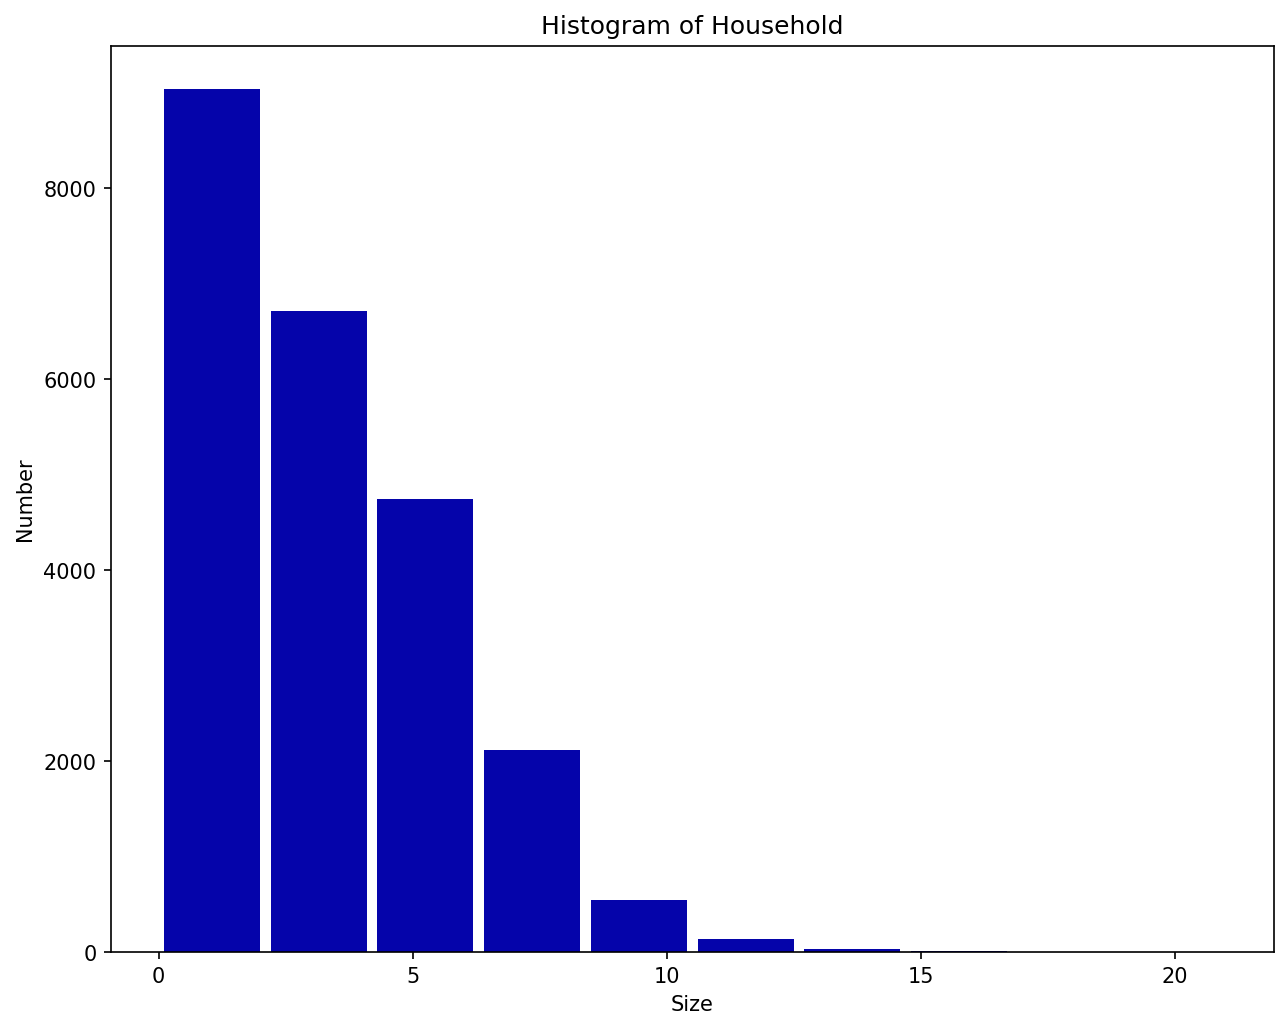

In [36]:
# Historgram for household
plt.figure(figsize=(10,8),dpi=150)
plt.hist(x=df['household_size'],bins=10,color='#0504aa',rwidth=0.9)
plt.xlabel("Size")
plt.ylabel('Number')
plt.title("Histogram of Household")
plt.show()

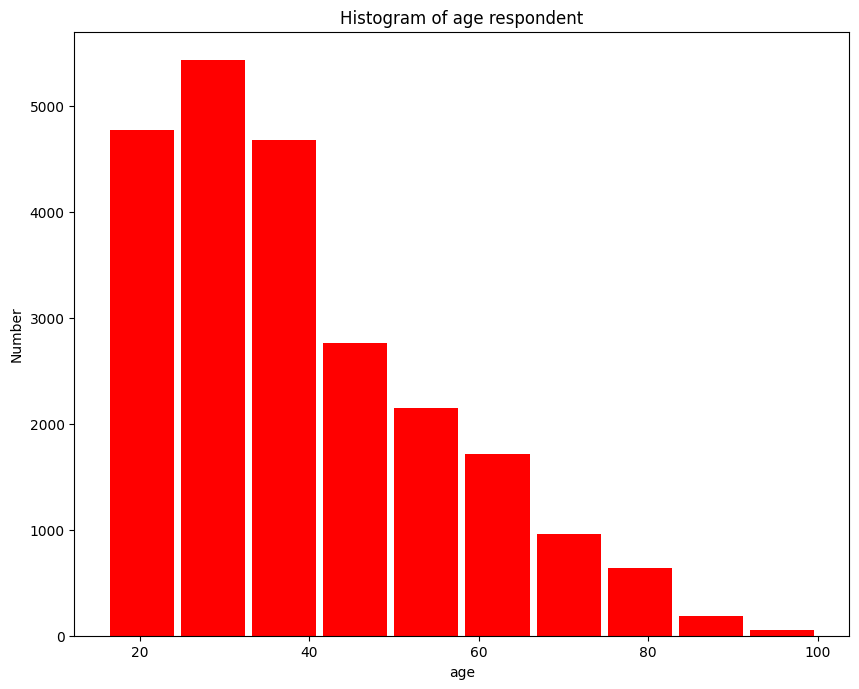

In [63]:
# Historgram for household
plt.figure(figsize=(10,8),dpi=100)
plt.hist(x=df['age'],bins=10,color='red',rwidth=0.9)
plt.xlabel("age")
plt.ylabel('Number')
plt.title("Histogram of age respondent")
plt.show()

<Figure size 3600x3000 with 0 Axes>

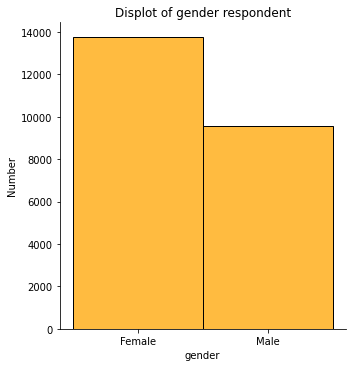

In [61]:
plt.figure(figsize=(12,10),dpi=300)
sns.displot(x=df['gender_of_respondent'],color="orange")
plt.xlabel("gender")
plt.ylabel('Number')
plt.title("Displot of gender respondent")
plt.show();

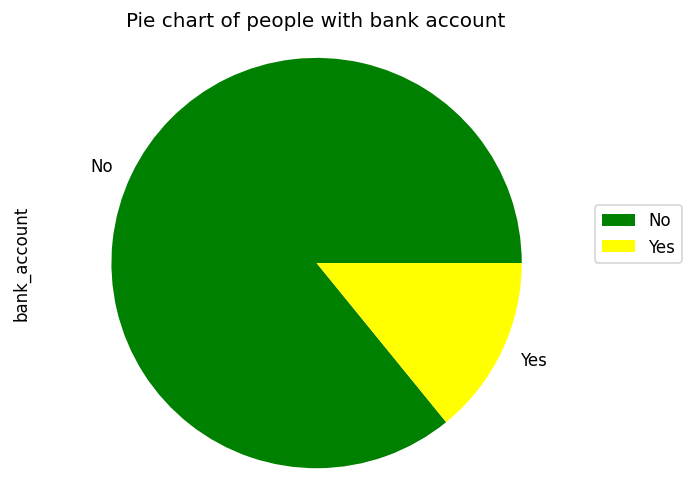

In [62]:
 fig1, ax1 = plt.subplots(figsize=(6, 5),dpi=120)
 bank = df['bank_account'].value_counts().plot(kind="pie",colors=["green","yellow"])
 plt.axis("equal")
 plt.legend(loc=(1,.5))
 plt.title('Pie chart of people with bank account')
 plt.show()

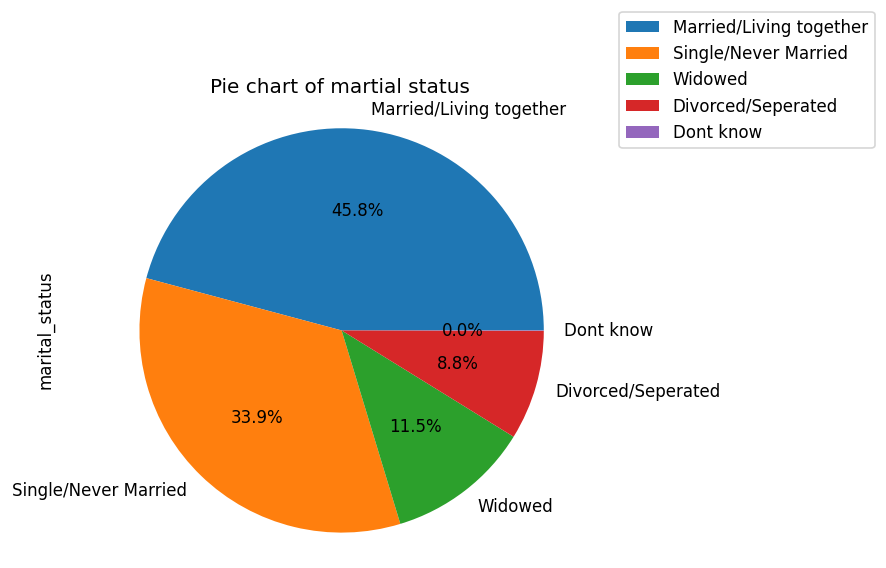

In [73]:
fig1, ax1 = plt.subplots(figsize=(6, 5),dpi=120)
martial= df['marital_status'].value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.axis("equal")
plt.legend(loc=(1,0.9))
plt.title('Pie chart of martial status')
plt.show()

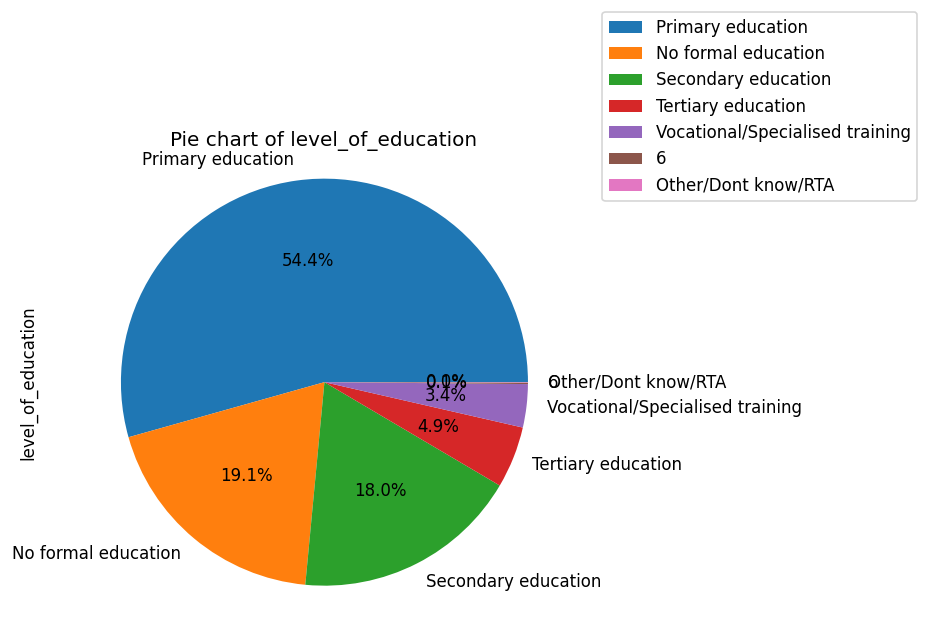

In [74]:
fig1, ax1 = plt.subplots(figsize=(6, 5),dpi=120)
level_of_education= df['level_of_education'].value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.axis("equal")
plt.legend(loc=(1,0.9))
plt.title('Pie chart of level_of_education')
plt.show()

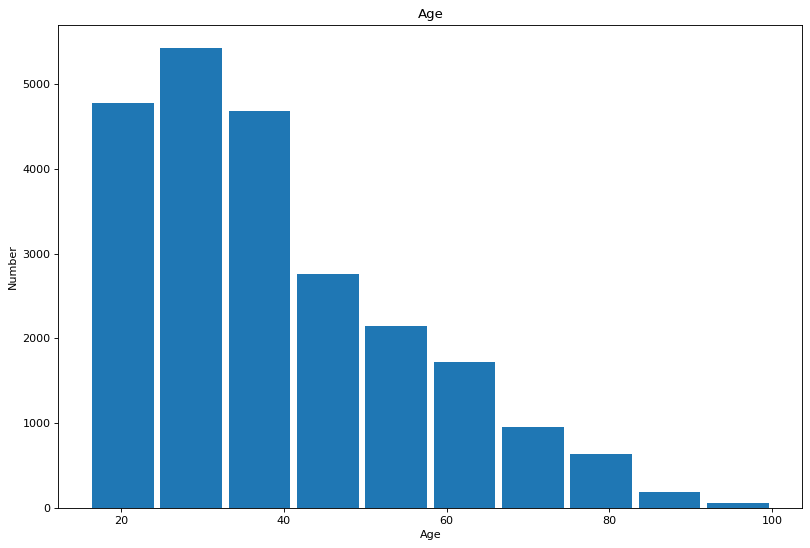

In [83]:
plt.figure(figsize=(12,8),dpi=80)
plt.hist(x=df['age'],rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Number')
plt.title('Age')
plt.show()

## Bivariate analysis


###numerical vs numerical

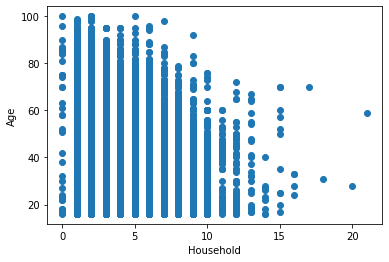

In [90]:
#Scatter plot
plt.scatter(x=df.household_size,y =df.age)
plt.xlabel("Household")
plt.ylabel('Age')
plt.show()

In [92]:
# calculating pearson coeffecient
pearson_coeff = df["age"].corr(df["household_size"], method="pearson") 
pearson_coeff

-0.11967115234154871

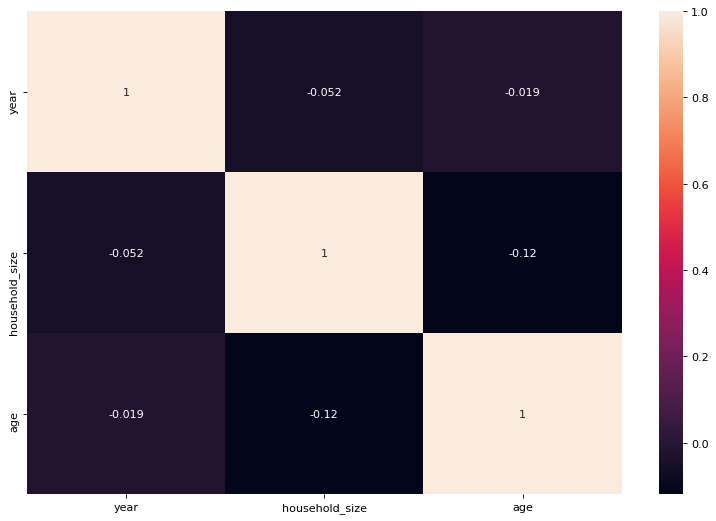

In [95]:
#showing correlation
plt.figure(figsize=(12,8),dpi=80)
sns.heatmap(df.corr(),annot=True)
plt.show()

<Figure size 960x640 with 0 Axes>

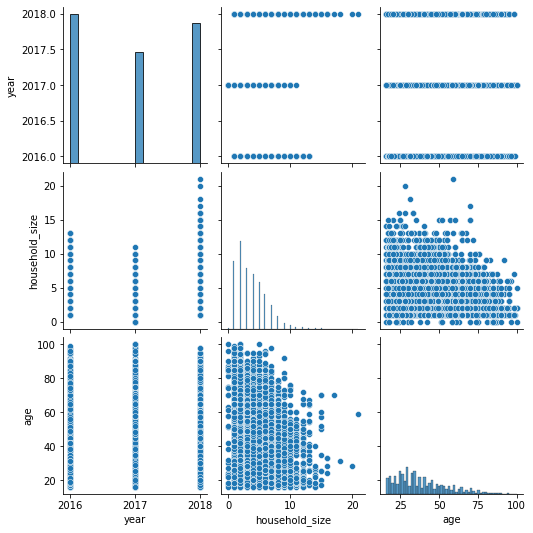

In [102]:
plt.figure(figsize=(12,8),dpi=80)
sns.pairplot(data=df)
plt.show()

In [103]:
from scipy import stats

In [104]:
age = df['age']
from scipy.stats import zscore
stats.zscore(age)

array([-0.89633609,  1.88824328, -0.77526742, ..., -0.71473308,
       -0.53313008, -1.13847342])

In [105]:
household = df['household_size']
from scipy.stats import zscore
stats.zscore(age)

array([-0.89633609,  1.88824328, -0.77526742, ..., -0.71473308,
       -0.53313008, -1.13847342])

### Multivariate analysis

In [110]:
df.columns

Index(['country', 'year', 'bank_account', 'location', 'cell_phone_access',
       'household_size', 'age', 'gender_of_respondent',
       'the_relationship_with_head', 'marital_status', 'level_of_education',
       'job_type'],
      dtype='object')

In [159]:
df.select_dtypes(include='object')

,country,bank_account,location,gender_of_respondent,marital_status
0,Kenya,Yes,Rural,Female,Married/Living together
1,Kenya,No,Rural,Female,Widowed
2,Kenya,Yes,Urban,Male,Single/Never Married
3,Kenya,No,Rural,Female,Married/Living together
4,Kenya,No,Urban,Male,Single/Never Married
...,...,...,...,...,...
23519,Uganda,No,Rural,Female,Divorced/Seperated
23520,Uganda,No,Rural,Female,Single/Never Married
23521,Uganda,No,Rural,Female,Widowed
23522,Uganda,No,Urban,Female,Divorced/Seperated


In [160]:
df_nums = df.select_dtypes(exclude='object')

In [161]:
df_objs = df.select_dtypes(include='object')

In [162]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 23523
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        23340 non-null  int64  
 1   cell_phone_access           23340 non-null  int64  
 2   household_size              23340 non-null  float64
 3   age                         23340 non-null  float64
 4   the_relationship_with_head  23340 non-null  int64  
 5   level_of_education          23340 non-null  int64  
 6   job_type                    23340 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 2.0 MB


In [129]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 23523
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   country               23340 non-null  object
 1   bank_account          23340 non-null  object
 2   location              23340 non-null  object
 3   gender_of_respondent  23340 non-null  object
 4   marital_status        23340 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [163]:
df_objs = pd.get_dummies(df_objs,drop_first=True)


In [164]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [175]:
final_df.columns

Index(['year', 'cell_phone_access', 'household_size', 'age',
       'the_relationship_with_head', 'level_of_education', 'job_type',
       'country_Rwanda', 'country_Tanzania', 'country_Uganda',
       'bank_account_Yes', 'location_Urban', 'gender_of_respondent_Male',
       'marital_status_Dont know', 'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed'],
      dtype='object')

In [176]:
X = final_df.drop('bank_account_Yes',axis=1)
y = final_df["bank_account_Yes"]

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [180]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [181]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [182]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[3883  125]
 [ 459  201]]
Accuracy0.8748928877463582


## Follow up questions
At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.





###a) Did we have the right Data?
No. Since the data in insufficient to predict which individuals are most likely to have or use a bank account.



###b). Do we need other data to answer our question?
Yes. Having data indicating the income of people will be of importance since we will be able to know how much they earn and in relation to their incomes we will be able to predict if they are most likely to have or use a bank account



###c). Did we have the right question?
yes, Since access to bank accounts has been regarded as an indicator of financial inclusion.
